Tratamento da base - ID3


In [1]:
!pip -q install plotly --upgrade

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [62]:
# Abrindo arquivo csv
base = pd.read_csv('/content/sample_data/play_tennis.csv', sep=',', usecols=['outlook', 'temp', 'humidity', 'wind', 'play'])

In [63]:
base

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [64]:
base.head(3)

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes


In [65]:
base.tail(2)

,outlook,temp,humidity,wind,play
12,Overcast,Hot,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [66]:
# contando quantidade de instâncias
Classificação = base.columns[-1]
np.unique(base[Classificação], return_counts=True)

(array(['No', 'Yes'], dtype=object), array([5, 9]))

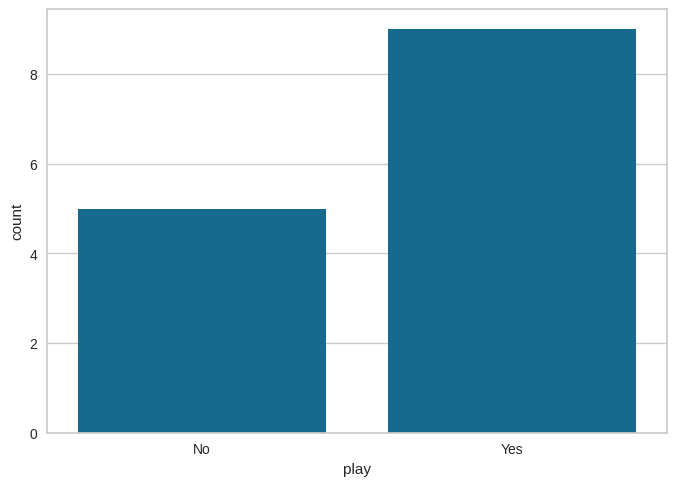

In [67]:
sns.countplot(x = base[Classificação]);

**Tratamento dos atributos da base**

In [68]:
#variavel auxiliar
existe = False

#Verificar se tem dados numéricos
if base.select_dtypes(include=['number']).shape[1] > 0:
  print("Não é possível processar dados numéricos")
  existe = True

#Verificar se tem dados ausentes
base = base.replace('?', np.nan)
if  base.isnull().any().any():
  print("Não é possível processar dados ausentes")
  existe = True


LabelEncoder para tratamento

In [44]:
from sklearn.preprocessing import LabelEncoder

In [70]:
#if not existe:
  #para codificar todos os atributos para laberEncoder de uma única vez
  #base_encoded = base.apply(LabelEncoder().fit_transform)

#cols_label_encode = ['outlook', 'temp', 'humidity', 'wind']
#base[cols_label_encode] = base[cols_label_encode]

In [71]:
#base_encoded
base

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [72]:
#base_encoded.shape
base.shape

(14, 5)

In [73]:
!pip -q install yellowbrick
!pip install --upgrade scikit-learn

In [76]:
# Supondo que a última coluna seja o target
X_prev= base.iloc[:, :-1]
y_classe = base.iloc[:, -1]

Método de Amostragem Holdout

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_prev

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [79]:
y_classe

,play
0,No
1,No
2,Yes
3,Yes
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


In [80]:
y_classe.shape

(14,)

In [81]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [82]:
X_treino.shape

(11, 4)

In [83]:
X_teste.shape

(3, 4)

In [84]:
X_teste

,outlook,temp,humidity,wind
9,Rain,Mild,Normal,Weak
11,Overcast,Mild,High,Strong
0,Sunny,Hot,High,Weak


In [85]:
y_treino

,play
12,Yes
5,No
8,Yes
2,Yes
1,No
13,No
4,Yes
7,No
10,Yes
3,Yes


In [86]:
y_teste

,play
9,Yes
11,Yes
0,No


**Biblioteca - ID3**

In [87]:
import graphviz
from graphviz import Digraph

In [88]:
class ID3:
    def __init__(self):
        self.arvore = None

    # Treina a árvore
    def fit(self, X, y):
        self.arvore = self._id3(X, y)
        return self

    # Faz previsões em um DataFrame
    def predict(self, X):
        return X.apply(lambda linha: self._classificar(self.arvore, linha), axis=1)

    # Método recursivo para construir a árvore
    def _id3(self, X, y):
        # Caso 1: todas instâncias da mesma classe
        if len(y.unique()) == 1:
            return {
                "leaf": True,
                "class": y.iloc[0],
                "samples": len(y),
                "value": y.value_counts().to_dict(),
                "entropy": 0.0
            }

        # Caso 2: não há mais atributos
        if len(X.columns) == 0:
            return {
                "leaf": True,
                "class": y.mode()[0],
                "samples": len(y),
                "value": y.value_counts().to_dict(),
                "entropy": self._entropia(y)
            }

        # Entropia da classe
        counts = y.value_counts()
        total = len(y)
        entropia_classe = 0
        for count in counts:
            prob = count / total
            if prob > 0:
                entropia_classe -= prob * np.log2(prob)

        # Ganho de informação de cada atributo
        ganhos = {}
        for atributo in X.columns:
            entropia_atributo = 0
            for valor in X[atributo].unique():
                idx = X[X[atributo] == valor].index
                y_sub = y.loc[idx]
                total_sub = len(y_sub)
                ent_sub = 0
                for count_sub in y_sub.value_counts():
                    prob_sub = count_sub / total_sub
                    if prob_sub > 0:
                        ent_sub -= prob_sub * np.log2(prob_sub)
                entropia_atributo += (total_sub / total) * ent_sub
            ganhos[atributo] = entropia_classe - entropia_atributo

        melhor_atributo = max(ganhos, key=ganhos.get)

        nodo = {
            "leaf": False,
            "atributo": melhor_atributo,
            "samples": len(y),
            "value": y.value_counts().to_dict(),
            "entropy": round(entropia_classe, 3),
            "class": y.mode()[0],
            "filhos": {}
        }

        # Cria galhos
        for valor in X[melhor_atributo].unique():
            idx = X[X[melhor_atributo] == valor].index
            X_sub = X.loc[idx].drop(columns=[melhor_atributo])
            y_sub = y.loc[idx]
            if len(y_sub) == 0:
                nodo["filhos"][valor] = {
                    "leaf": True,
                    "class": y.mode()[0],
                    "samples": 0,
                    "value": {},
                    "entropy": 0.0
                }
            else:
                nodo["filhos"][valor] = self._id3(X_sub, y_sub)

        return nodo

     # Classifica um exemplo
    def _classificar(self, arvore, exemplo):
        if arvore["leaf"]:
            return arvore["class"]

        atributo = arvore["atributo"]
        valor = exemplo[atributo]

        if valor in arvore["filhos"]:
            return self._classificar(arvore["filhos"][valor], exemplo)
        else:
            # valor desconhecido → retorna classe majoritária do nó
            return arvore["class"]

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def plot_decision_tree(tree_dict, X, y, color_palette=None):

    class_names = sorted(y.unique())

    if color_palette:
        color_map = color_palette
    else:
        default_colors = ['#17A589', '#F39C12', '#3498DB', '#E74C3C', '#8E44AD']
        color_map = {name: default_colors[i % len(default_colors)] for i, name in enumerate(class_names)}

    def draw_node(node, x=0.5, y=1, dx=0.3, dy=0.2, ax=None):
        counts_dict = node.get("value", {})
        total_samples = sum(counts_dict.values())

        face_color = 'lightgray'
        if total_samples > 0:
            majority_class = max(counts_dict, key=counts_dict.get)
            purity = counts_dict[majority_class] / total_samples

            major_color_rgb = np.array(mcolors.to_rgb(color_map.get(majority_class, '#CCCCCC')))
            white_rgb = np.array([1.0, 1.0, 1.0])
            interpolated_color = white_rgb + (major_color_rgb - white_rgb) * purity
            face_color = mcolors.to_hex(interpolated_color)

        counts_str = f"[{', '.join(str(counts_dict.get(c, 0)) for c in class_names)}]"
        if node["leaf"]:
            label = f"class = {node['class']}\n{counts_str}"
        else:
            label = f"{node['atributo']}\n{counts_str}\nentropy = {node['entropy']:.2f}"

        node_box = dict(boxstyle='square,pad=0.5', fc=face_color, ec='black', lw=1)
        ax.text(x, y, label, ha='center', va='center', bbox=node_box, fontsize=11)

        if not node["leaf"]:
            child_nodes = list(node["filhos"].items())
            num_children = len(child_nodes)

            if num_children > 1:
                child_x_positions = np.linspace(x - dx, x + dx, num_children)
            else:
                child_x_positions = [x]

            for i, (value, child_node) in enumerate(child_nodes):
                child_x = child_x_positions[i]
                child_y = y - dy

                ax.plot([x, child_x], [y, child_y], 'k-', lw=1.5, zorder=1)

                edge_label_box = dict(boxstyle="square,pad=0.2", fc="white", ec="none")
                ax.text((x + child_x) / 2, (y + child_y) / 2, str(value),
                        ha='center', va='center', fontsize=10, bbox=edge_label_box, zorder=2)

                draw_node(child_node, x=child_x, y=child_y, dx=dx*0.5, dy=dy, ax=ax)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('off')
    ax.margins(x=0.1, y=0.1)
    plt.tight_layout()
    draw_node(tree_dict, ax=ax)
    plt.show()

In [90]:
# testar se o modelo acertou
y_teste

,play
9,Yes
11,Yes
0,No


In [91]:
# Instancia
modelo = ID3()

# Treina
modelo.fit(X_treino, y_treino)

# Previsões
previsoes = modelo.predict(X_teste)


In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

1.0

In [93]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1, 0],
       [0, 2]])

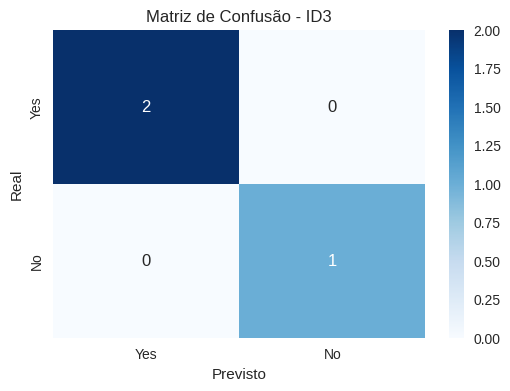

In [94]:
cm = confusion_matrix(y_teste, previsoes, labels=y_teste.unique())
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=y_teste.unique(),
            yticklabels=y_teste.unique())

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - ID3")
plt.show()

In [95]:
# Acessando a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, previsoes)

precisoes = []
recalls = []
f1_scores = []

# Acessando os elementos da matriz de confusão
for i in range(len(matriz_confusao)):
    VP = matriz_confusao[i, i]                # Verdadeiro Positivo
    FN = matriz_confusao[i, :].sum() - VP      # Falsos Negativos
    FP = matriz_confusao[:, i].sum() - VP      # Falsos Positivos
    VN = matriz_confusao.sum() - (VP + FP + FN)  # Verdadeiro Negativo


    precisao = VP / (VP + FP) if (VP + FP) > 0 else 0.0
    recall   = VP / (VP + FN) if (VP + FN) > 0 else 0.0
    f1_score = 2 * (precisao * recall) / (precisao + recall) if (precisao + recall) > 0 else 0.0

    print(f"Classe {i}: Precisão={precisao:.3f}, Recall={recall:.3f}, F1={f1_score:.3f}")

    precisoes.append(precisao)
    recalls.append(recall)
    f1_scores.append(f1_score)

# médias manuais
print(f"Precisão média: {np.mean(precisoes):.3f}")
print(f"Recall médio: {np.mean(recalls):.3f}")
print(f"F1 médio: {np.mean(f1_scores):.3f}")

Classe 0: Precisão=1.000, Recall=1.000, F1=1.000
Classe 1: Precisão=1.000, Recall=1.000, F1=1.000
Precisão média: 1.000
Recall médio: 1.000
F1 médio: 1.000


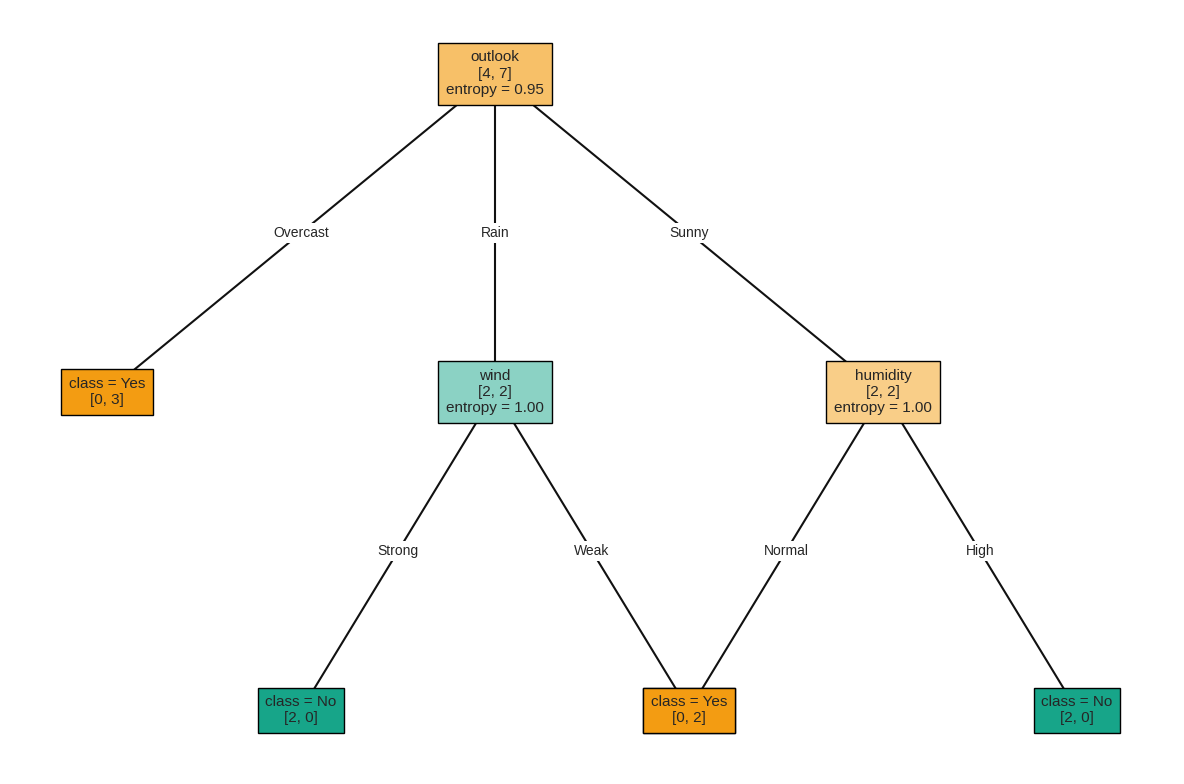

In [98]:
plot_decision_tree(modelo.arvore, X_treino, y_treino)